## Imports

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from datetime import datetime
import pytz
import json
import math

## Getting the data ready to be analyzed

In [401]:
catalan_wikibreaks_df = pd.read_json('../../wikidump/wikibreaks_refactored/cawiki_20210201_refactored_wikibreaks_dataset.json.gz', compression='gzip', lines=True)
# catalan_wikibreaks_df.head()

Number of rows and columns

In [402]:
catalan_wikibreaks_df.shape

(224, 5)

Basic info about the Pandas dataframe

In [403]:
catalan_wikibreaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_talk_page  40 non-null     float64
 1   name          224 non-null    object 
 2   wikibreaks    224 non-null    object 
 3   id_user_page  212 non-null    float64
 4   ambiguous     224 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 7.3+ KB


Basic stats

In [404]:
catalan_wikibreaks_df.describe()

,id_talk_page,id_user_page
count,4.000000e+01,2.120000e+02
mean,2.593810e+05,4.396391e+05
std,3.635949e+05,4.388541e+05
min,1.666000e+03,3.188000e+03
25%,3.824850e+04,1.123900e+05
50%,1.069250e+05,2.756325e+05
75%,2.775102e+05,6.250930e+05
max,1.282937e+06,1.812708e+06


#### Plot the graph chart to see ambiguous information retrieved

In [405]:
ambiguous_count = catalan_wikibreaks_df
ambiguous_count['count'] = 1
ambiguous_count = ambiguous_count[['ambiguous', 'count']].groupby('ambiguous').count().reset_index()
ambiguous_count

,ambiguous,count
0,False,212
1,True,12


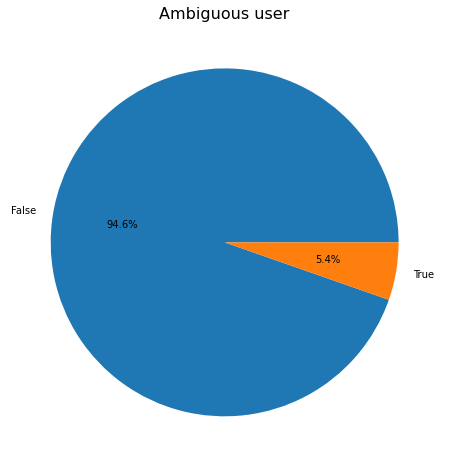

In [406]:
plt.figure(figsize=(16,8))
plt.pie(ambiguous_count['count'], labels=ambiguous_count['ambiguous'], autopct='%.1f%%')
plt.title('Ambiguous user', fontsize=16)
plt.show()

### Explicit the Wikibreaks

In [407]:
catalan_wikibreaks_refactored_df = list()
# iterating over the previous dataset
for i, row in catalan_wikibreaks_df.iterrows():
    # explicit the wikibreaks
    for el in row['wikibreaks']:
        new_row = row
        new_row = new_row.drop('wikibreaks')
        new_row['wikibreak'] = el['name']
        new_row['categories'] = el['categories']
        new_row['parameters'] = el['parameters']
        new_row['subcategory'] = el['subcategory']
        if el['to_date']:
            new_row['to_date'] = datetime.fromisoformat(el['to_date'])
        else:
            new_row['to_date'] = None
        new_row['from_date'] = datetime.fromisoformat(el['from_date'])
        catalan_wikibreaks_refactored_df.append(new_row)
catalan_wikibreaks_refactored_df = pd.DataFrame(catalan_wikibreaks_refactored_df).reset_index(drop=True)
# catalan_wikibreaks_refactored_df.head()

## Number of users still in wikibreaks or similar

In [408]:
still_in_breaks = catalan_wikibreaks_refactored_df.loc[pd.isnull(catalan_wikibreaks_refactored_df['to_date']), ['name', 'wikibreak', 'categories', 'subcategory']]
# still_in_breaks.head()

In [409]:
# still_in_breaks.describe()

In [410]:
users_still_in_breaks = still_in_breaks.groupby('name').count().reset_index()
# users_still_in_breaks.head()

In [411]:
users_still_in_breaks.describe()

,wikibreak,categories,subcategory
count,120.000000,120.000000,120.000000
mean,1.191667,1.191667,1.191667
std,0.415980,0.415980,0.415980
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000


## Number of users still in wikibreaks with respect to the total amount of users who specified at least a wikibreak during their wikihistory

In [412]:
catalan_wikibreaks_df.shape[0]

224

In [413]:
users_still_in_breaks.shape[0]

120

In [414]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - users_still_in_breaks.shape[0], 'label': 'not in break'}
row_break = {'total': users_still_in_breaks.shape[0], 'label': 'in break'}
rows = [row_total, row_break]
percentage_still_in_break = pd.DataFrame(rows).reset_index(drop=True)
percentage_still_in_break

,total,label
0,104,not in break
1,120,in break


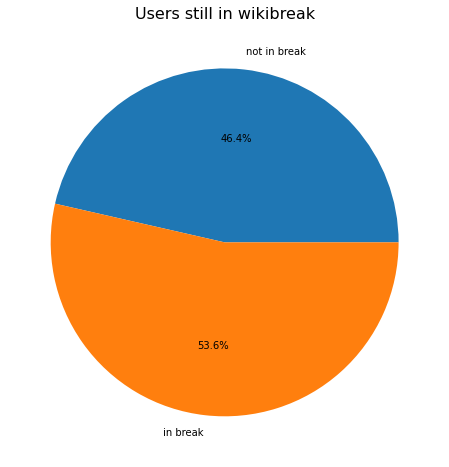

In [415]:
plt.figure(figsize=(16,8))
plt.pie(percentage_still_in_break['total'], labels=percentage_still_in_break['label'], autopct='%.1f%%')
plt.title('Users still in wikibreak', fontsize=16)
plt.show()

## Current wikibreaks templates

In [416]:
wikibreaks_still_in_breaks = still_in_breaks
wikibreaks_still_in_breaks['count'] = 1
wikibreaks_still_in_breaks = wikibreaks_still_in_breaks[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreaks_still_in_breaks.head()

,wikibreak,count
2,ocupat,43
0,exàmens,33
1,inactiu,28
4,usuari inactiu,26
5,viquidescans,12


In [417]:
wikibreaks_still_in_breaks.shape

(6, 2)

In [418]:
wikibreaks_still_in_breaks.describe()

,count
count,6.000000
mean,23.833333
std,15.065413
min,1.000000
25%,15.500000
50%,27.000000
75%,31.750000
max,43.000000


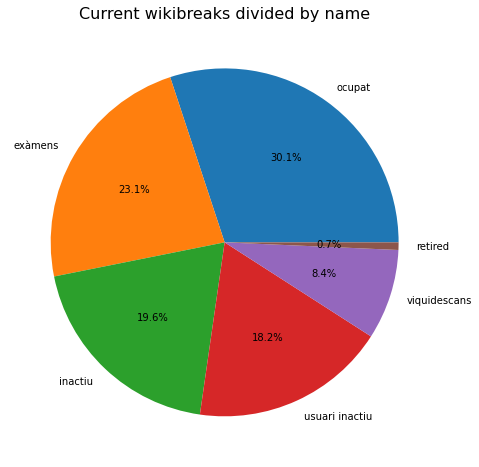

In [419]:
plt.figure(figsize=(16,8))
plt.pie(wikibreaks_still_in_breaks['count'], labels=wikibreaks_still_in_breaks['wikibreak'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by name', fontsize=16)
plt.show()

## Current subcategories

In [420]:
subcategories_still_in_breaks = still_in_breaks
subcategories_still_in_breaks['count'] = 1
subcategories_still_in_breaks = subcategories_still_in_breaks[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategories_still_in_breaks.head()

,subcategory,count
3,wikibreak,66
0,busy,43
1,exams,33
2,retired,1


In [421]:
subcategories_still_in_breaks.shape

(4, 2)

In [422]:
subcategories_still_in_breaks.describe()

,count
count,4.000000
mean,35.750000
std,26.973753
min,1.000000
25%,25.000000
50%,38.000000
75%,48.750000
max,66.000000


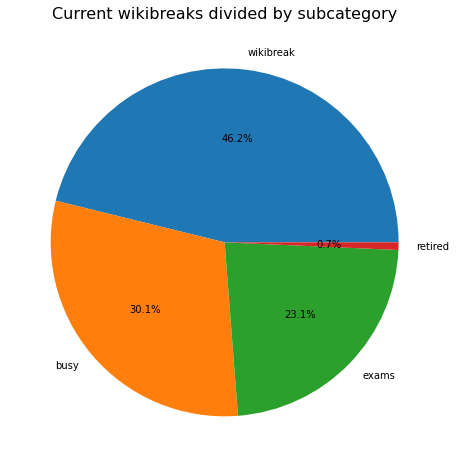

In [423]:
plt.figure(figsize=(16,8))
plt.pie(subcategories_still_in_breaks['count'], labels=subcategories_still_in_breaks['subcategory'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by subcategory', fontsize=16)
plt.show()

## Current wikibreaks

In [424]:
categories_still_in_breaks = still_in_breaks[['categories', 'name']]
categories_still_in_breaks_refactored = list()
for i, row in categories_still_in_breaks.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_still_in_breaks_refactored.append(new_row)
categories_still_in_breaks_refactored = pd.DataFrame(categories_still_in_breaks_refactored).reset_index(drop=True)
# categories_still_in_breaks_refactored.head()

In [425]:
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored
categories_still_in_breaks_refactored['count'] = 1
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
categories_still_in_breaks_refactored.head()

,category,count
0,break,99
1,mental,43
2,other,1


In [426]:
categories_still_in_breaks_refactored.shape

(3, 2)

In [427]:
categories_still_in_breaks_refactored.describe()

,count
count,3.000000
mean,47.666667
std,49.166384
min,1.000000
25%,22.000000
50%,43.000000
75%,71.000000
max,99.000000


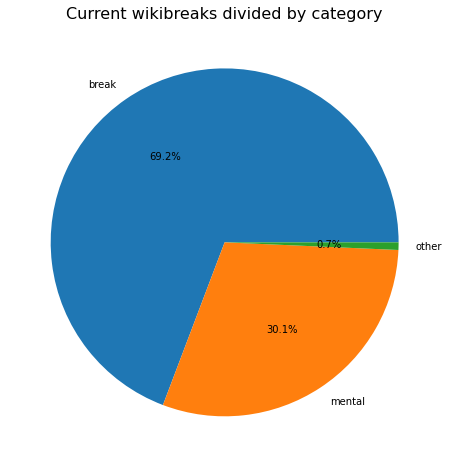

In [428]:
plt.figure(figsize=(16,8))
plt.pie(categories_still_in_breaks_refactored['count'], labels=categories_still_in_breaks_refactored['category'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by category', fontsize=16)
plt.show()

# Line graph to see the flow of wikibreaks in Catalan Wikipedia

In [429]:
# unique wikibreaks
wikibreaks = catalan_wikibreaks_refactored_df['wikibreak'].unique()
wikibreaks

array(['exàmens', 'viquidescans', 'usuari inactiu', 'inactiu', 'ocupat',
       'retired', 'dead', 'user warning-mentalhealth'], dtype=object)

In [430]:
# unique subcategories
subcategories = catalan_wikibreaks_refactored_df['subcategory'].unique()
subcategories

array(['exams', 'wikibreak', 'busy', 'retired', 'deceased wikipedian',
       'user mental health'], dtype=object)

In [431]:
# unique categories
categories = list()
for i, row in catalan_wikibreaks_refactored_df[['categories', 'name']].iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories.append(new_row)
categories = pd.DataFrame(categories).reset_index(drop=True)
categories = categories['category'].unique()
categories

array(['break', 'mental', 'other', 'health related'], dtype=object)

In [432]:
# date to start from
start_from = catalan_wikibreaks_refactored_df['from_date'].min()
start_from

Timestamp('2005-08-16 13:07:42+0000', tz='UTC')

In [433]:
last_date = datetime.now().replace(tzinfo=pytz.UTC)
last_date

datetime.datetime(2021, 4, 22, 12, 20, 31, 757052, tzinfo=<UTC>)

In [434]:
breaks_history = list()
catalan_wikibreaks_simple_date = catalan_wikibreaks_refactored_df
catalan_wikibreaks_simple_date['from_date'] = catalan_wikibreaks_simple_date['from_date'].dt.normalize()
catalan_wikibreaks_simple_date['from_date'] = catalan_wikibreaks_simple_date['from_date'].apply(lambda r: r.replace(day=1))
catalan_wikibreaks_simple_date['to_date'] = catalan_wikibreaks_simple_date['to_date'].dt.normalize()
catalan_wikibreaks_simple_date['to_date'] = catalan_wikibreaks_simple_date['to_date'].apply(lambda r: r.replace(day=1))
# iterating over years
for year in range(start_from.year, last_date.year + 1):
    if year == start_from.year: # first year
        start_month = start_from.month
    else:
        start_month = 1
    
    if year == last_date.year: # last year
        last_month = last_date.month
    else:
        last_month = 12
    
    for month in range(start_month, last_month + 1):
        mask = (catalan_wikibreaks_simple_date['from_date'] <= datetime(year, month, 1).replace(tzinfo=pytz.UTC))
        mask_2 = (pd.isnull(catalan_wikibreaks_simple_date['to_date'])) | (catalan_wikibreaks_simple_date['to_date'] >= datetime(year, month, 1).replace(tzinfo=pytz.UTC)) 
        mask = mask & mask_2
        filtered = catalan_wikibreaks_simple_date[mask]
        for j, elem in filtered.iterrows():
            el = dict()
            el['year'] = year
            el['month'] = month
            el['subcategory'] = elem['subcategory']
            el['wikibreak'] = elem['wikibreak']
            el['categories'] = elem['categories']
            breaks_history.append(el)
breaks_history = pd.DataFrame(breaks_history).reset_index(drop=True)
breaks_history.head()

,year,month,subcategory,wikibreak,categories
0,2005,8,wikibreak,usuari inactiu,[break]
1,2005,10,wikibreak,usuari inactiu,[break]
2,2005,10,wikibreak,usuari inactiu,[break]
3,2005,10,wikibreak,usuari inactiu,[break]
4,2005,10,wikibreak,usuari inactiu,[break]


In [435]:
breaks_history.shape

(22042, 5)

In [436]:
breaks_history.describe()

,year,month
count,22042.000000,22042.000000
mean,2014.221033,6.477997
std,4.006217,3.469584
min,2005.000000,1.000000
25%,2011.000000,3.000000
50%,2014.000000,6.000000
75%,2018.000000,10.000000
max,2021.000000,12.000000


In [437]:
breaks_history_subcategory_count = breaks_history
breaks_history_subcategory_count['count'] = 1
breaks_history_subcategory_count = breaks_history_subcategory_count[['year', 'month', 'subcategory', 'count']].groupby(['year', 'month',  'subcategory']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_subcategory_count['date'] = pd.to_datetime(breaks_history_subcategory_count[['year','month']].assign(day=1)).dt.date
breaks_history_subcategory_count.head()

,year,month,subcategory,count,date
0,2005,8,wikibreak,1,2005-08-01
1,2005,10,wikibreak,18,2005-10-01
2,2005,11,wikibreak,18,2005-11-01
3,2005,12,wikibreak,17,2005-12-01
4,2006,1,wikibreak,16,2006-01-01


In [438]:
breaks_history_subcategory_count.tail()

,year,month,subcategory,count,date
576,2021,3,wikibreak,66,2021-03-01
577,2021,4,busy,43,2021-04-01
578,2021,4,exams,33,2021-04-01
579,2021,4,retired,1,2021-04-01
580,2021,4,wikibreak,66,2021-04-01


In [439]:
breaks_history_subcategory_count.describe()

,year,month,count
count,581.000000,581.000000,581.000000
mean,2013.380379,6.462995,37.938038
std,4.476940,3.461725,18.705327
min,2005.000000,1.000000,1.000000
25%,2010.000000,3.000000,26.000000
50%,2013.000000,6.000000,38.000000
75%,2017.000000,9.000000,46.000000
max,2021.000000,12.000000,71.000000


#### Clean counter

In [440]:
breaks_history_subcategory_count_cleaned = list()
for date in breaks_history_subcategory_count['date'].unique():
    for subcat in subcategories:
        elem = breaks_history_subcategory_count.loc[(breaks_history_subcategory_count['date'] == date) & (breaks_history_subcategory_count['subcategory'] == subcat)]
        if elem.empty:
            breaks_history_subcategory_count_cleaned.append([date.year, date.month, subcat, 0, date])
        else:
            breaks_history_subcategory_count_cleaned.append(np.array(elem)[0])
breaks_history_subcategory_count_cleaned = pd.DataFrame(breaks_history_subcategory_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'subcategory', 'count', 'date'], axis=1)
breaks_history_subcategory_count_cleaned.head()

,year,month,subcategory,count,date
0,2005,8,exams,0,2005-08-01
1,2005,8,wikibreak,1,2005-08-01
2,2005,8,busy,0,2005-08-01
3,2005,8,retired,0,2005-08-01
4,2005,8,deceased wikipedian,0,2005-08-01


## Subcategories during Catalan Wikipedia history

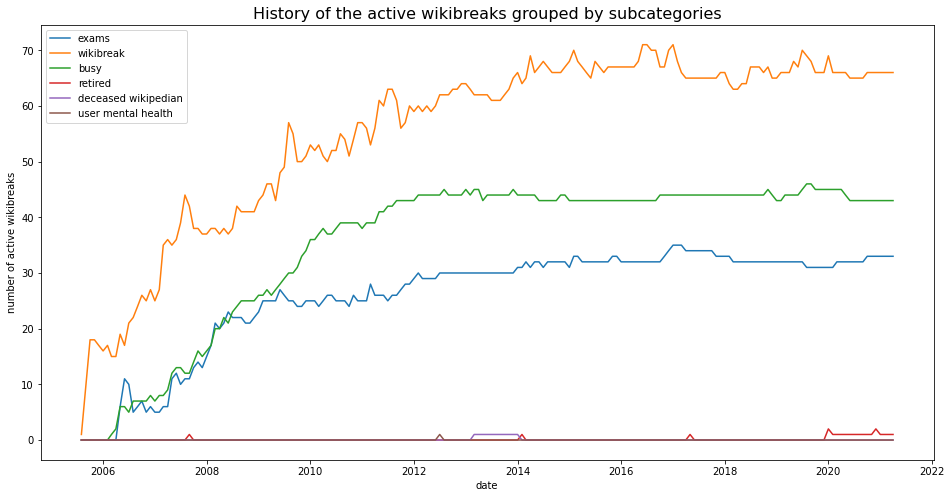

In [441]:
plt.figure(figsize=(16,8))
for subcategory in breaks_history_subcategory_count_cleaned['subcategory'].unique():
    subcat = breaks_history_subcategory_count_cleaned[breaks_history_subcategory_count_cleaned['subcategory'] == subcategory]
    plt.plot(subcat['date'], subcat['count'], label = subcategory)
plt.legend()
plt.title('History of the active wikibreaks grouped by subcategories', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [442]:
fig = px.line(breaks_history_subcategory_count_cleaned, x='date', y='count', color='subcategory', title='History of the active wikibreaks grouped by subcategories')
fig.show()

The same but with the names of the pauses

In [443]:
breaks_history_wikibreak_count = breaks_history
breaks_history_wikibreak_count['count'] = 1
breaks_history_wikibreak_count = breaks_history_wikibreak_count[['year', 'month', 'wikibreak', 'count']].groupby(['year', 'month', 'wikibreak']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_wikibreak_count['date'] = pd.to_datetime(breaks_history_wikibreak_count[['year','month']].assign(day=1)).dt.date
breaks_history_wikibreak_count.head()

,year,month,wikibreak,count,date
0,2005,8,usuari inactiu,1,2005-08-01
1,2005,10,usuari inactiu,18,2005-10-01
2,2005,11,usuari inactiu,18,2005-11-01
3,2005,12,usuari inactiu,17,2005-12-01
4,2006,1,usuari inactiu,16,2006-01-01


In [444]:
breaks_history_wikibreak_count.tail()

,year,month,wikibreak,count,date
922,2021,4,inactiu,28,2021-04-01
923,2021,4,ocupat,43,2021-04-01
924,2021,4,retired,1,2021-04-01
925,2021,4,usuari inactiu,26,2021-04-01
926,2021,4,viquidescans,12,2021-04-01


In [445]:
breaks_history_wikibreak_count.describe()

,year,month,count
count,927.000000,927.000000,927.000000
mean,2013.463862,6.471413,23.777778
std,4.381206,3.461450,11.785347
min,2005.000000,1.000000,1.000000
25%,2010.000000,3.000000,13.000000
50%,2013.000000,6.000000,25.000000
75%,2017.000000,9.000000,30.000000
max,2021.000000,12.000000,46.000000


#### Clean counter

In [446]:
breaks_history_wikibreak_count_cleaned = list()
for date in breaks_history_wikibreak_count['date'].unique():
    for wb in wikibreaks:
        elem = breaks_history_wikibreak_count.loc[(breaks_history_wikibreak_count['date'] == date) & (breaks_history_wikibreak_count['wikibreak'] == wb)]
        if elem.empty:
            breaks_history_wikibreak_count_cleaned.append([date.year, date.month, wb, 0, date])
        else:
            breaks_history_wikibreak_count_cleaned.append(np.array(elem)[0])
breaks_history_wikibreak_count_cleaned = pd.DataFrame(breaks_history_wikibreak_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'wikibreak', 'count', 'date'], axis=1)
breaks_history_wikibreak_count_cleaned.head()

,year,month,wikibreak,count,date
0,2005,8,exàmens,0,2005-08-01
1,2005,8,viquidescans,0,2005-08-01
2,2005,8,usuari inactiu,1,2005-08-01
3,2005,8,inactiu,0,2005-08-01
4,2005,8,ocupat,0,2005-08-01


## Wikibreaks during Catalan Wikipedia history

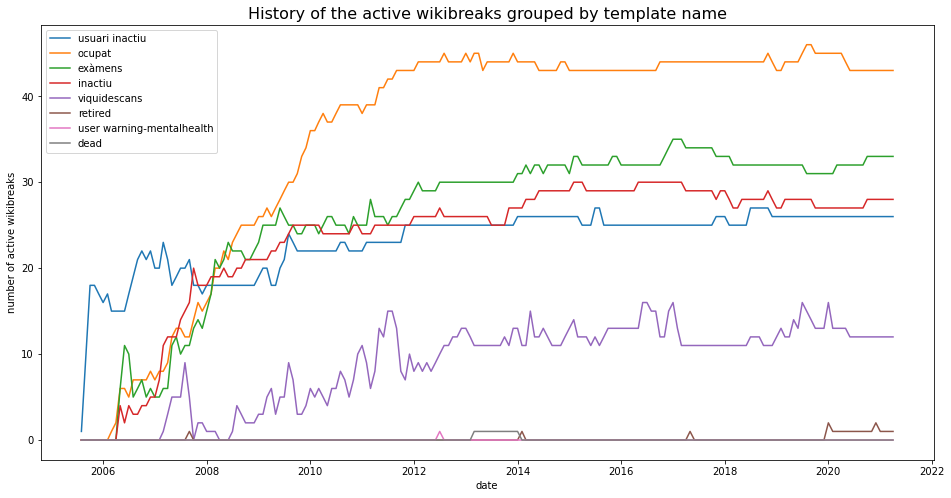

In [447]:
plt.figure(figsize=(16,8))
for wikibreak in breaks_history_wikibreak_count['wikibreak'].unique():
    wb = breaks_history_wikibreak_count_cleaned[breaks_history_wikibreak_count_cleaned['wikibreak'] == wikibreak]
    plt.plot(wb['date'], wb['count'], label = wikibreak)
plt.legend()
plt.title('History of the active wikibreaks grouped by template name', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [448]:
fig = px.line(breaks_history_wikibreak_count_cleaned, x='date', y='count', color='wikibreak', title='History of the active wikibreaks grouped by template name')
fig.show()

In [449]:
breaks_history_category_count = breaks_history[['year', 'month', 'subcategory', 'categories']]
breaks_history_category_count.head()

,year,month,subcategory,categories
0,2005,8,wikibreak,[break]
1,2005,10,wikibreak,[break]
2,2005,10,wikibreak,[break]
3,2005,10,wikibreak,[break]
4,2005,10,wikibreak,[break]


In [450]:
breaks_history_category_count_refactored = list()
for i, row in breaks_history_category_count.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        breaks_history_category_count_refactored.append(new_row)
breaks_history_category_count_refactored = pd.DataFrame(breaks_history_category_count_refactored).reset_index(drop=True)
breaks_history_category_count_refactored.head()

,year,month,subcategory,category
0,2005,8,wikibreak,break
1,2005,10,wikibreak,break
2,2005,10,wikibreak,break
3,2005,10,wikibreak,break
4,2005,10,wikibreak,break


In [451]:
breaks_history_category_count_refactored = breaks_history_category_count_refactored
breaks_history_category_count_refactored['count'] = 1
breaks_history_category_count_refactored = breaks_history_category_count_refactored[['year', 'month', 'category', 'count']].groupby(['year', 'month', 'category']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_category_count_refactored['date'] = pd.to_datetime(breaks_history_category_count_refactored[['year','month']].assign(day=1)).dt.date
breaks_history_category_count_refactored.head()

,year,month,category,count,date
0,2005,8,break,1,2005-08-01
1,2005,10,break,18,2005-10-01
2,2005,11,break,18,2005-11-01
3,2005,12,break,17,2005-12-01
4,2006,1,break,16,2006-01-01


In [452]:
breaks_history_category_count_refactored.tail()

,year,month,category,count,date
396,2021,3,mental,43,2021-03-01
397,2021,3,other,1,2021-03-01
398,2021,4,break,99,2021-04-01
399,2021,4,mental,43,2021-04-01
400,2021,4,other,1,2021-04-01


In [453]:
breaks_history_category_count_refactored.shape

(401, 5)

In [454]:
breaks_history_wikibreak_count.describe()

,year,month,count
count,927.000000,927.000000,927.000000
mean,2013.463862,6.471413,23.777778
std,4.381206,3.461450,11.785347
min,2005.000000,1.000000,1.000000
25%,2010.000000,3.000000,13.000000
50%,2013.000000,6.000000,25.000000
75%,2017.000000,9.000000,30.000000
max,2021.000000,12.000000,46.000000


#### Clean counter

In [455]:
breaks_history_category_count_refactored_cleaned = list()
for date in breaks_history_category_count_refactored['date'].unique():
    for cat in categories:
        elem = breaks_history_category_count_refactored.loc[(breaks_history_category_count_refactored['date'] == date) & (breaks_history_category_count_refactored['category'] == cat)]
        if elem.empty:
            breaks_history_category_count_refactored_cleaned.append([date.year, date.month, cat, 0, date])
        else:
            breaks_history_category_count_refactored_cleaned.append(np.array(elem)[0])
breaks_history_category_count_refactored_cleaned = pd.DataFrame(breaks_history_category_count_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'category', 'count', 'date'], axis=1)
breaks_history_category_count_refactored_cleaned.head()

,year,month,category,count,date
0,2005,8,break,1,2005-08-01
1,2005,8,mental,0,2005-08-01
2,2005,8,other,0,2005-08-01
3,2005,8,health related,0,2005-08-01
4,2005,10,break,18,2005-10-01


## Categories during Catalan Wikipedia history

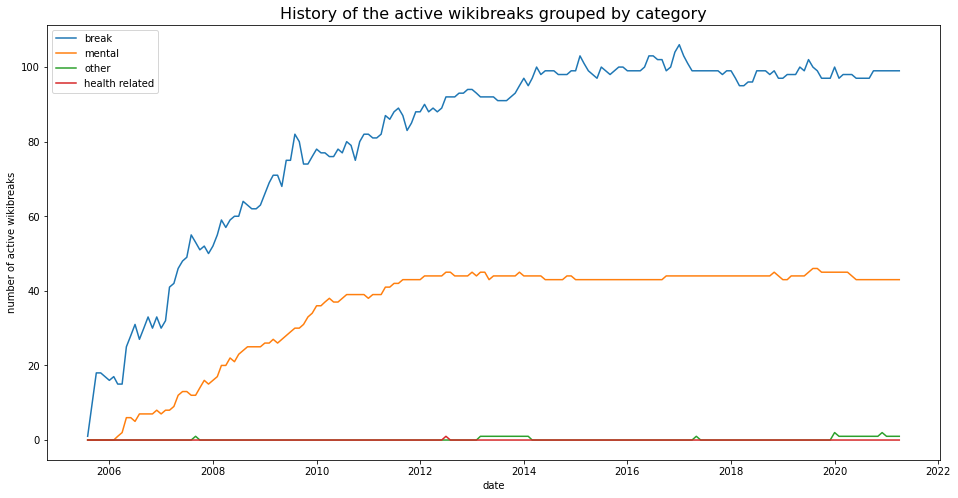

In [456]:
plt.figure(figsize=(16,8))
for cat in breaks_history_category_count_refactored_cleaned['category'].unique():
    category = breaks_history_category_count_refactored_cleaned[breaks_history_category_count_refactored_cleaned['category'] == cat]
    plt.plot(category['date'], category['count'], label = cat)
plt.legend()
plt.title('History of the active wikibreaks grouped by category', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [457]:
fig = px.line(breaks_history_category_count_refactored_cleaned, x='date', y='count', color='category', title='History of the active wikibreaks grouped by category')
fig.show()

## Total number of times a certain template was used

In [458]:
# catalan_wikibreaks_refactored_df.head()

In [459]:
wikibreak_used = catalan_wikibreaks_refactored_df
wikibreak_used['count'] = 1
wikibreak_used = wikibreak_used[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreak_used.head()

,wikibreak,count
7,viquidescans,129
1,exàmens,85
3,ocupat,70
6,usuari inactiu,70
2,inactiu,54


In [460]:
wikibreak_used.shape

(8, 2)

In [461]:
wikibreak_used.describe()

,count
count,8.000000
mean,52.000000
std,46.272485
min,1.000000
25%,4.750000
50%,62.000000
75%,73.750000
max,129.000000


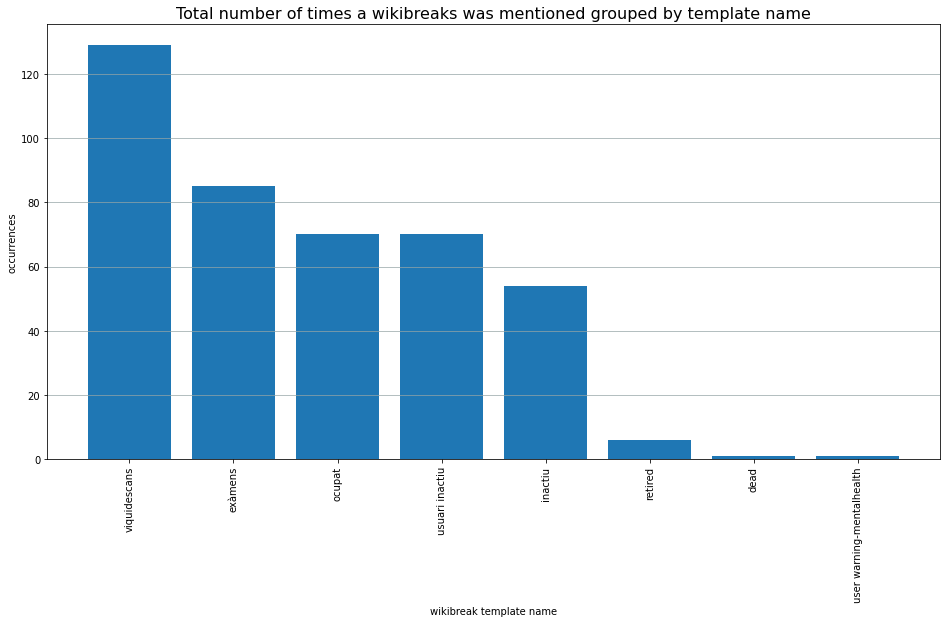

In [462]:
plt.figure(figsize=(16,8))
plt.bar(wikibreak_used['wikibreak'], wikibreak_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by template name', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain subcategory was mentioned

In [463]:
subcategory_used = catalan_wikibreaks_refactored_df
subcategory_used['count'] = 1
subcategory_used = subcategory_used[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategory_used.head()

,subcategory,count
5,wikibreak,253
2,exams,85
0,busy,70
3,retired,6
1,deceased wikipedian,1


In [464]:
subcategory_used.shape

(6, 2)

In [465]:
subcategory_used.describe()

,count
count,6.000000
mean,69.333333
std,97.292686
min,1.000000
25%,2.250000
50%,38.000000
75%,81.250000
max,253.000000


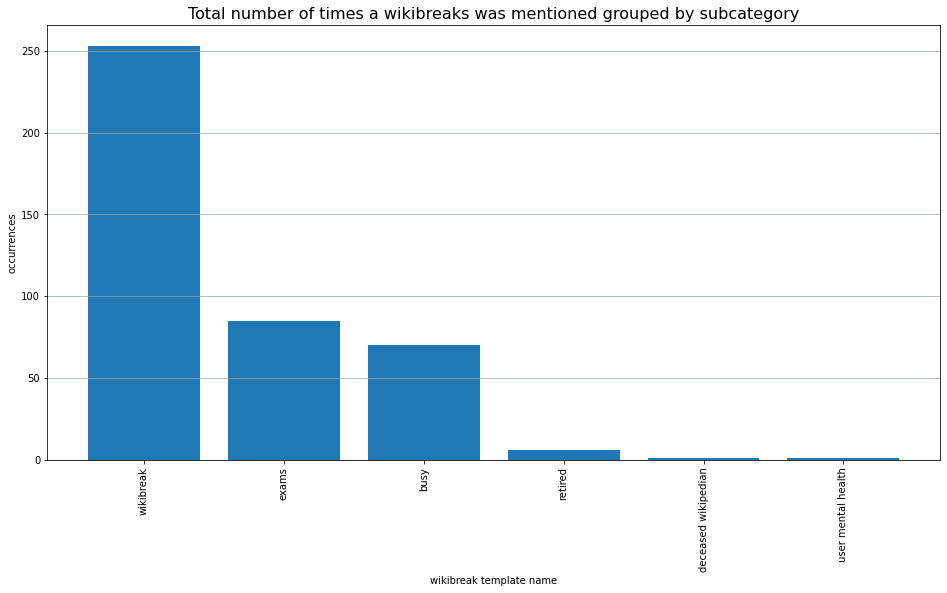

In [466]:
plt.figure(figsize=(16,8))
plt.bar(subcategory_used['subcategory'], subcategory_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.title('Total number of times a wikibreaks was mentioned grouped by subcategory', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain category was mentioned

In [467]:
category_used = still_in_breaks[['categories', 'name']]
category_used = list()
for i, row in catalan_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        category_used.append(new_row)
category_used = pd.DataFrame(category_used).reset_index(drop=True)
# category_used.head()

In [468]:
category_used['count'] = 1
category_used = category_used[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
category_used.head()

,category,count
0,break,338
2,mental,71
3,other,7
1,health related,1


In [469]:
category_used.shape

(4, 2)

In [470]:
category_used.describe()

,count
count,4.000000
mean,104.250000
std,159.020701
min,1.000000
25%,5.500000
50%,39.000000
75%,137.750000
max,338.000000


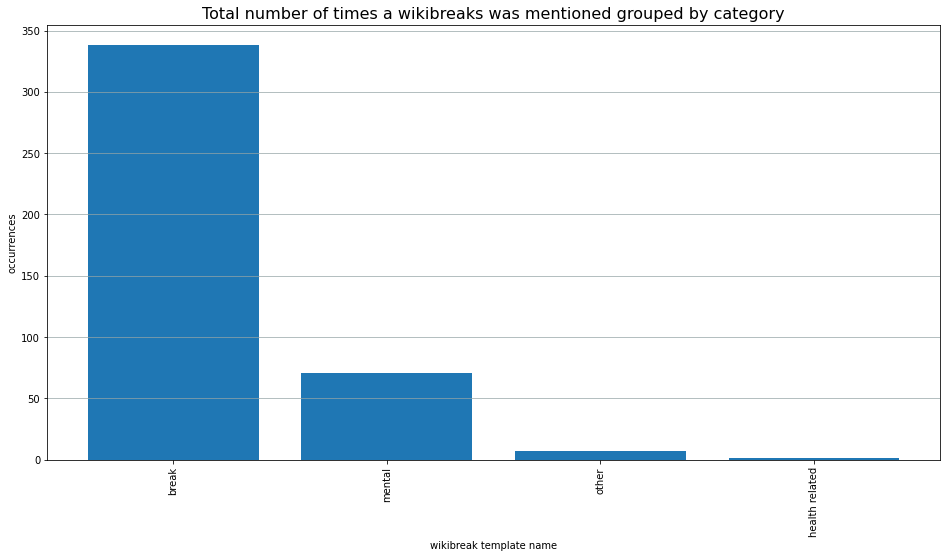

In [471]:
plt.figure(figsize=(16,8))
plt.bar(category_used['category'], category_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by category', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same template)

In [472]:
# catalan_wikibreaks_refactored_df.head()

In [473]:
users_multiple_times_wikibreak = catalan_wikibreaks_refactored_df
users_multiple_times_wikibreak['count'] = 1
# users_multiple_times_wikibreak.head()

In [474]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak.head()

In [475]:
total_users = catalan_wikibreaks_df.shape[0]
total_users

224

In [476]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak.loc[users_multiple_times_wikibreak['count'] >= 2]
# users_multiple_times_wikibreak.head()

In [477]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

65

In [478]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,159,single time
1,65,multiple times


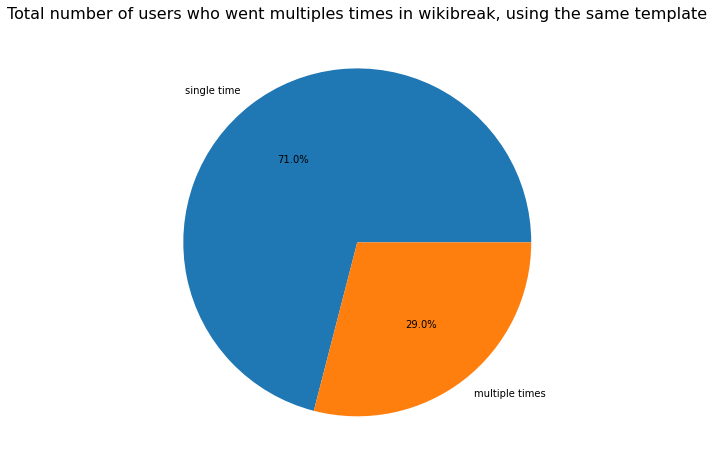

In [479]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template', fontsize=16)
plt.show()

### Remove ambiguous users 

In [480]:
users_multiple_times_wikibreak_not_ambiguous = catalan_wikibreaks_refactored_df
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['ambiguous'] == False, ['name', 'wikibreak']]
users_multiple_times_wikibreak_not_ambiguous['count'] = 1
# users_multiple_times_wikibreak_not_ambiguous.head()

In [481]:
users_multiple_times_wikibreak_not_ambiguous.shape

(379, 3)

In [482]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak_not_ambiguous.head()

In [483]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['count'] >= 2]
# users_multiple_times_wikibreak_not_ambiguous.head()

In [484]:
total_users_multiple_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.shape[0]
total_users_multiple_wikibreak_not_ambiguous

51

Still over the total amount of users

In [485]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_users_multiple_wikibreak_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_wikibreak_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,173,single time
1,51,multiple times


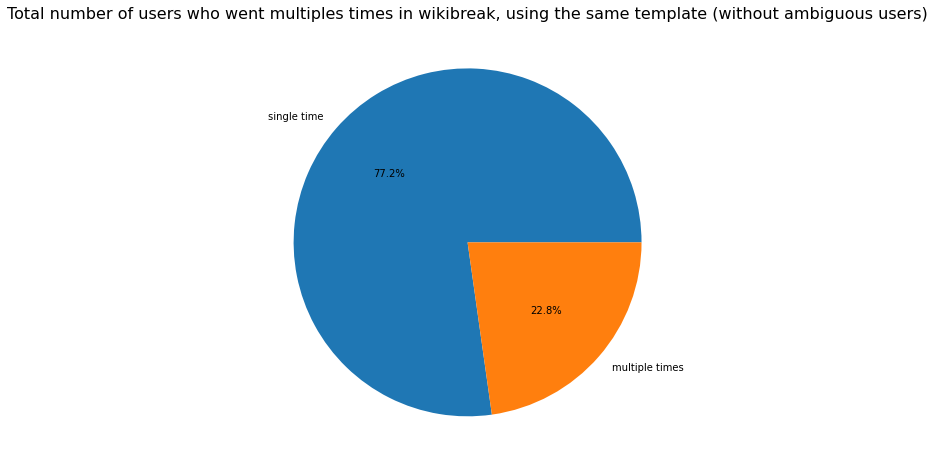

In [486]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same subcategory)

In [487]:
# catalan_wikibreaks_refactored_df.head()

In [488]:
users_multiple_times_subcategory = catalan_wikibreaks_refactored_df
users_multiple_times_subcategory['count'] = 1
# users_multiple_times_subcategory.head()

In [489]:
users_multiple_times_subcategory.shape

(416, 11)

In [490]:
users_multiple_times_subcategory = users_multiple_times_subcategory[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory.head()

In [491]:
users_multiple_times_subcategory = users_multiple_times_subcategory.loc[users_multiple_times_subcategory['count'] >= 2]
# users_multiple_times_subcategory.head()

In [492]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

65

In [493]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,159,single time
1,65,multiple times


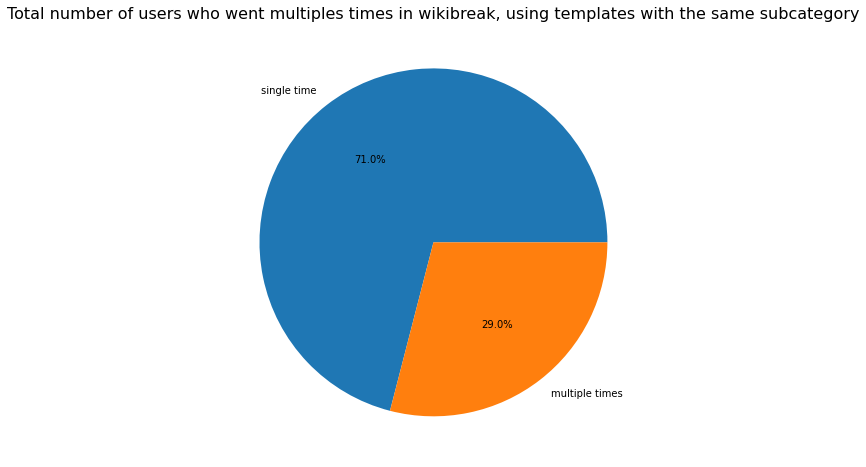

In [494]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory', fontsize=16)
plt.show()

### Remove ambiguous users 

In [495]:
users_multiple_times_subcategory_not_ambiguous = catalan_wikibreaks_refactored_df
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['ambiguous'] == False, ['name', 'subcategory']]
users_multiple_times_subcategory_not_ambiguous['count'] = 1
# users_multiple_times_subcategory_not_ambiguous.head()

In [496]:
users_multiple_times_subcategory_not_ambiguous.shape

(379, 3)

In [497]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory_not_ambiguous.head()

In [498]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['count'] >= 2]
# users_multiple_times_subcategory_not_ambiguous.head()

In [499]:
total_users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.shape[0]
total_users_multiple_times_subcategory_not_ambiguous

57

Still over the total

In [500]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_users_multiple_times_subcategory_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_times_subcategory_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,167,single time
1,57,multiple times


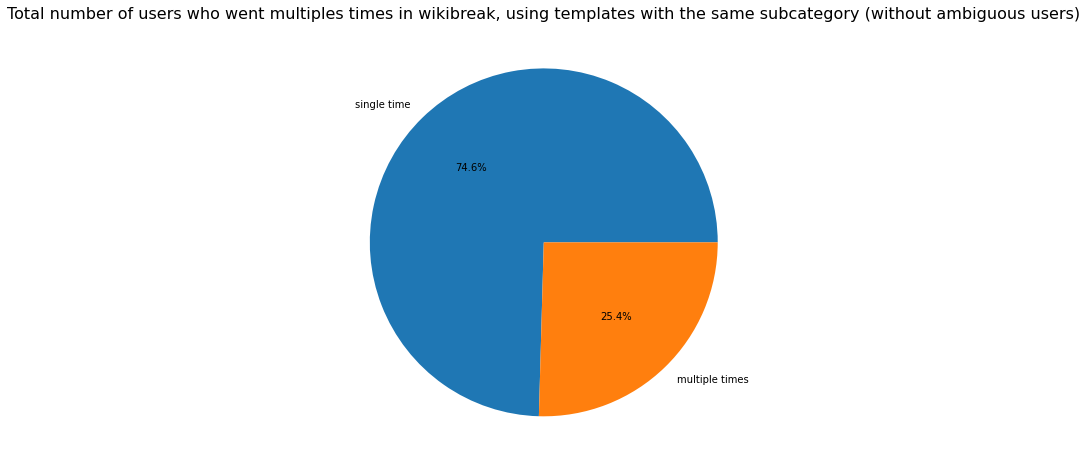

In [501]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same category)

In [502]:
# catalan_wikibreaks_refactored_df.head()

#### Explicit the category

In [503]:
categories_multiple_times = catalan_wikibreaks_refactored_df[['categories', 'name']]
categories_multiple_times_refactored = list()
for i, row in catalan_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_multiple_times_refactored.append(new_row)
categories_multiple_times_refactored = pd.DataFrame(categories_multiple_times_refactored).reset_index(drop=True)
# categories_multiple_times_refactored.head()

In [504]:
categories_multiple_times.shape

(416, 2)

In [505]:
categories_multiple_times_refactored = categories_multiple_times_refactored
categories_multiple_times_refactored['count'] = 1
# categories_multiple_times_refactored.head()

In [506]:
categories_multiple_times_refactored = categories_multiple_times_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# categories_multiple_times_refactored.head()

In [507]:
categories_multiple_times_refactored = categories_multiple_times_refactored.loc[categories_multiple_times_refactored['count'] >= 2]
# categories_multiple_times_refactored.head()

In [508]:
total_category_multiple = categories_multiple_times_refactored.shape[0]
total_category_multiple

74

In [509]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_category_multiple, 'label': 'single time'}
row_multiple = {'total': total_category_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,150,single time
1,74,multiple times


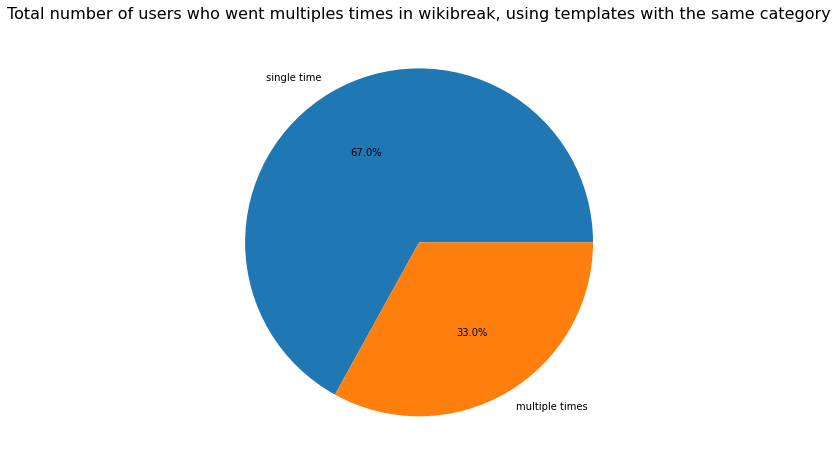

In [510]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category', fontsize=16)
plt.show()

### Remove ambiguous users 

In [511]:
users_multiple_times_category_not_ambiguous = catalan_wikibreaks_refactored_df
users_multiple_times_category_not_ambiguous = users_multiple_times_category_not_ambiguous.loc[users_multiple_times_category_not_ambiguous['ambiguous'] == False, ['name', 'categories']]
users_multiple_times_category_not_ambiguous['count'] = 1
# users_multiple_times_category_not_ambiguous.head()

In [512]:
users_multiple_times_category_not_ambiguous_refactored = list()
for i, row in users_multiple_times_category_not_ambiguous.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        users_multiple_times_category_not_ambiguous_refactored.append(new_row)
users_multiple_times_category_not_ambiguous_refactored = pd.DataFrame(users_multiple_times_category_not_ambiguous_refactored).reset_index(drop=True)
# users_multiple_times_category_not_ambiguous_refactored.head()

In [513]:
users_multiple_times_category_not_ambiguous_refactored.shape

(380, 3)

In [514]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# users_multiple_times_category_not_ambiguous_refactored.head()

In [515]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored.loc[users_multiple_times_category_not_ambiguous_refactored['count'] >= 2]
# users_multiple_times_category_not_ambiguous_refactored.head()

In [516]:
total_category_multiple_not_ambiguous = users_multiple_times_category_not_ambiguous_refactored.shape[0]
total_category_multiple_not_ambiguous

62

In [517]:
row_total = {'total': catalan_wikibreaks_df.shape[0] - total_category_multiple_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_category_multiple_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,162,single time
1,62,multiple times


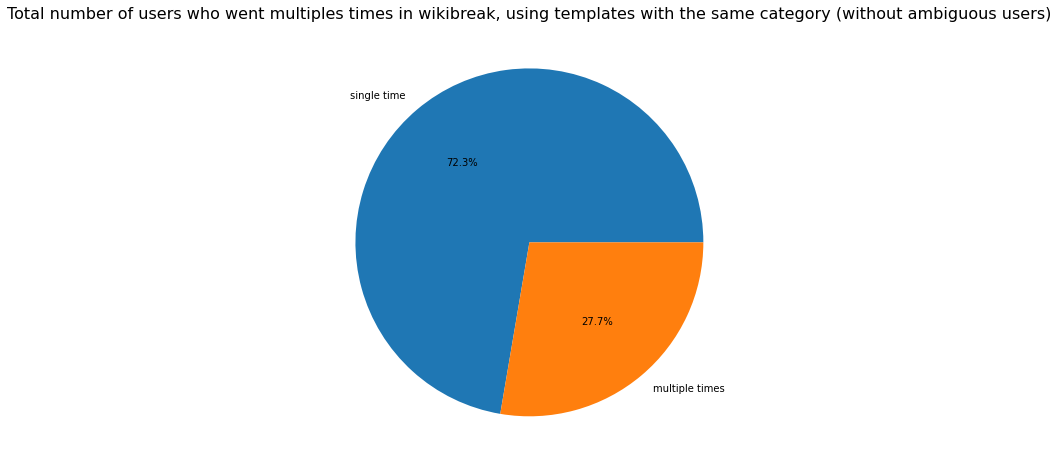

In [518]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category (without ambiguous users)', fontsize=16)

plt.show()

# Parameters analysis

In [519]:
# catalan_wikibreaks_refactored_df.head()

## Explicit the parameters associated with the wikibreak considering each wikibreak of each user

In [520]:
parameters_explicited = list()
for i, row in catalan_wikibreaks_refactored_df.iterrows():
    for el in row['parameters']:
        new_row = row
        new_row = new_row.drop('parameters')
        new_row['parameters'] = el['options']
        parameters_explicited.append(new_row)
parameters_explicited = pd.DataFrame(parameters_explicited).reset_index(drop=True)
# parameters_explicited.head()

### Wikibreak analysis

In [521]:
wikibreaks_parameters_df_list = list()

for wikibreak in wikibreaks:
    tmp_df = parameters_explicited.loc[parameters_explicited['wikibreak'] == wikibreak, ['name', 'parameters', 'count', 'wikibreak']]
    wikibreaks_parameters_df_list.append(tmp_df.reset_index(drop=True))

In [522]:
# wikibreaks_parameters_df_list[0].head()

Empty or filled parameters

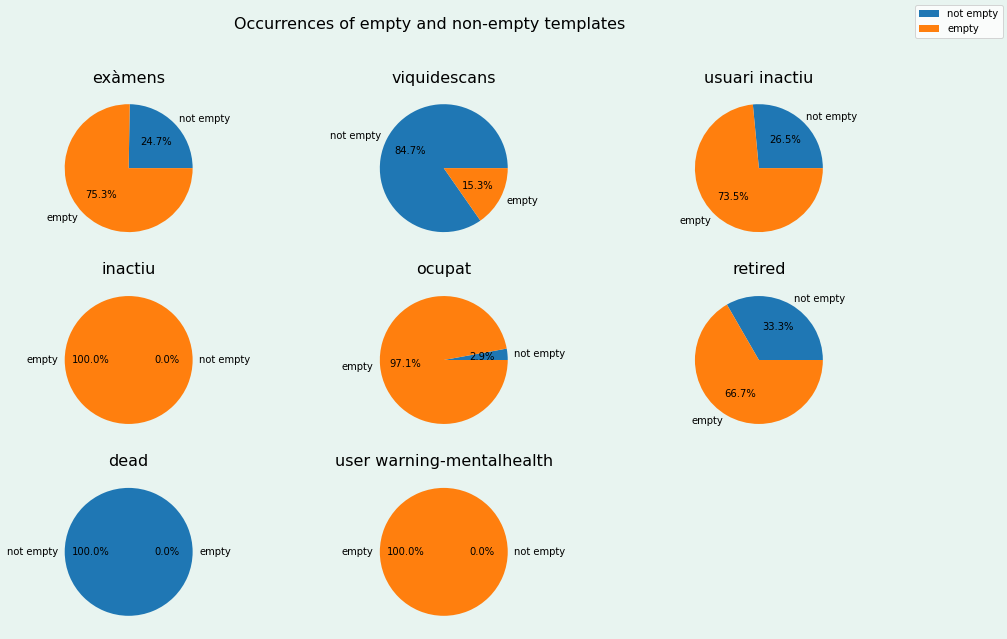

In [523]:
fig, axes = plt.subplots(math.ceil(len(wikibreaks)/3), 3, figsize=(16, 10), facecolor='#e8f4f0', squeeze=False)

last_axes = None

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] == {}, ['wikibreak', 'parameters', 'count']].groupby(['wikibreak']).count().reset_index(drop=True)
    total_empty = grouped['count']
    
    if not total_empty.empty:
        total_empty = total_empty[0]
    else:
        total_empty = 0
    
    # total empty over total
    row_total = {'total': extracted.shape[0] - total_empty, 'label': 'not empty'}
    row_empty = {'total': total_empty, 'label': 'empty'}
    rows = [row_total, row_empty]
    percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
    
    # figure
    ax = axes[i // 3, i % 3]
    ax.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
    ax.set_title(wikibreak, fontsize=16)
    
    last_axes = i % 3
    
    
for i in range((math.ceil(len(wikibreaks)/3) - 1) * 3 + last_axes + 1, math.ceil(len(wikibreaks)/3) * 3):
    fig.delaxes(axes.flatten()[i])

    
fig.suptitle('Occurrences of empty and non-empty templates', fontsize=16)
fig.legend(['not empty', 'empty'])
plt.show()

Total filled over parameterized

In [524]:
total_without_parameters = parameters_explicited.loc[parameters_explicited['parameters'] == {}, ['wikibreak', 'parameters', 'count']]
total_without_parameters.head()

,wikibreak,parameters,count
0,exàmens,{},1
1,exàmens,{},1
4,usuari inactiu,{},1
5,usuari inactiu,{},1
6,exàmens,{},1


In [525]:
row_total = {'total': parameters_explicited.shape[0] - total_without_parameters.shape[0], 'label': 'not empty'}
row_empty = {'total': total_without_parameters.shape[0], 'label': 'empty'}
rows = [row_total, row_empty]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times.head()

,total,label
0,302,not empty
1,309,empty


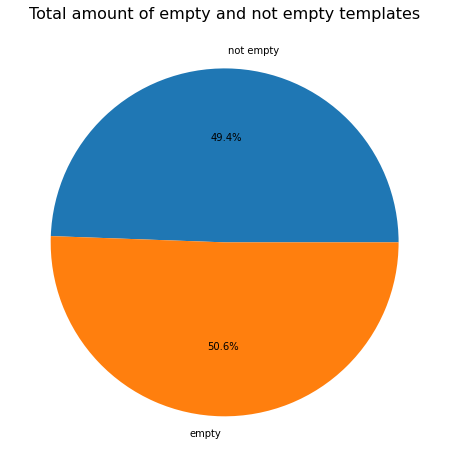

In [526]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total amount of empty and not empty templates', fontsize=16)
plt.show()

## Most used parameter per template

In [527]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] != {}, ['wikibreak', 'parameters', 'count']]
    most_used_parameters_per_template_list = list()
    for i, row in extracted.iterrows():
        for key, value in row['parameters'].items():
            new_row = row
            new_row = new_row.drop('parameters')
            new_row['param_name'] = key
            new_row['param_value'] = value
            most_used_parameters_per_template_list.append(new_row)
    most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))

#most_used_parameters_per_template_df_list[0].head()

In [528]:
most_used_parameters_per_template_df_list[0].shape

(25, 5)

In [529]:
most_used_parameters_per_template_grouped_df_list = list()
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted = extracted[['count', 'wikibreak', 'param_name']].groupby(['param_name', 'wikibreak']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

,param_name,wikibreak,count
0,1,exàmens,20
1,2,exàmens,1
2,3,exàmens,1
3,data,exàmens,3


## Most used parameters per wikibreak

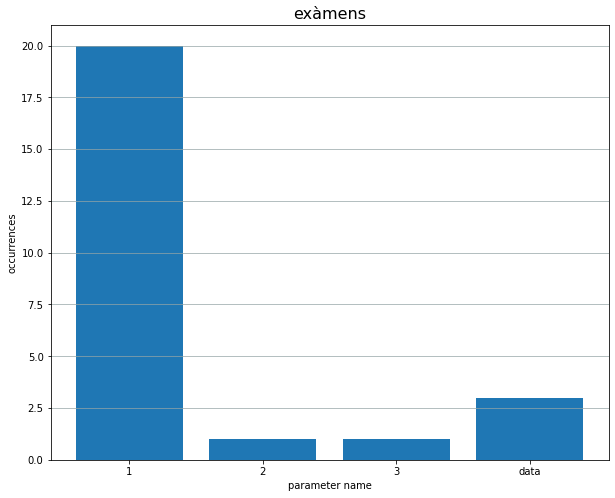

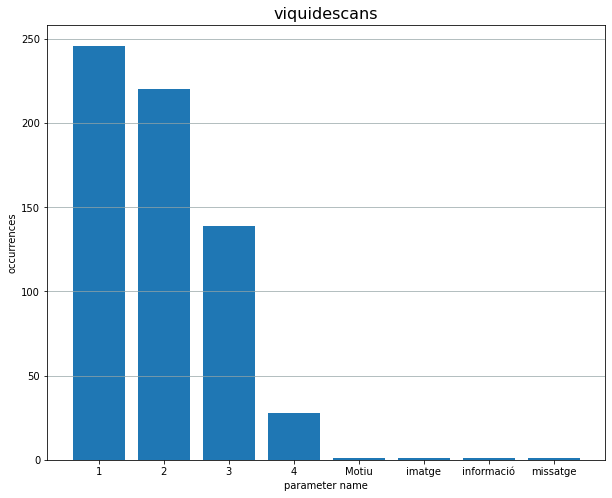

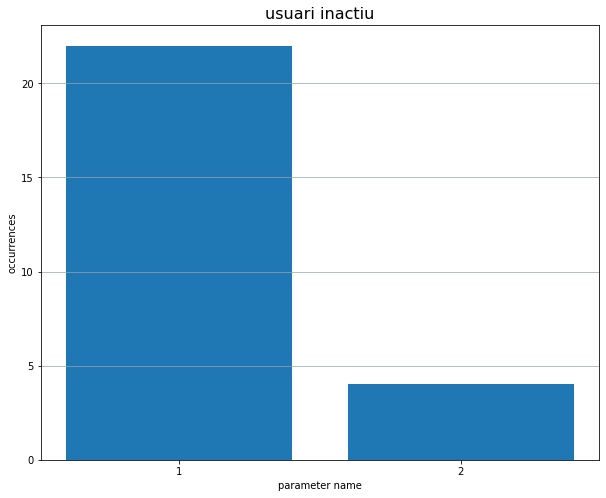

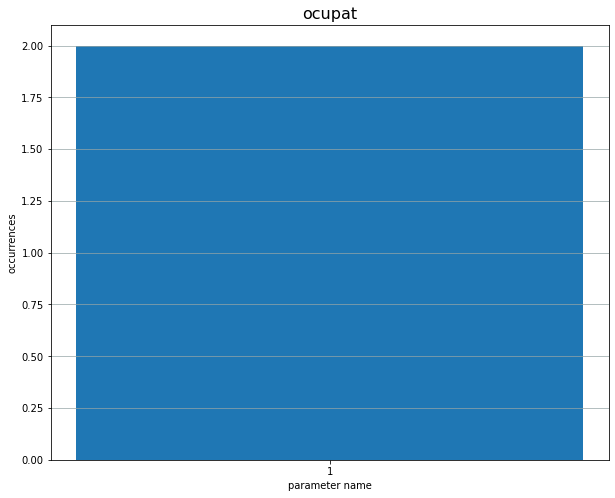

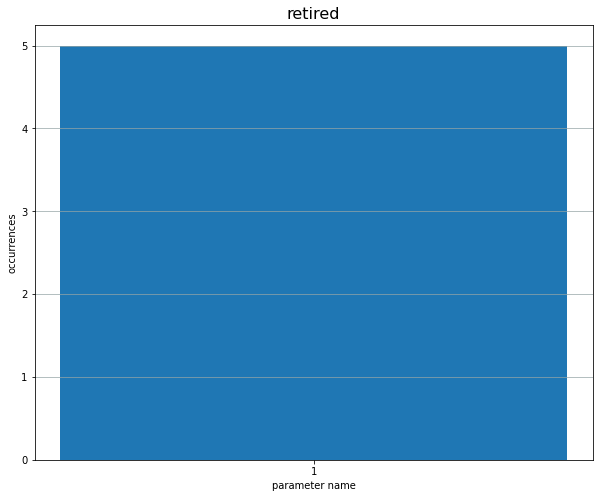

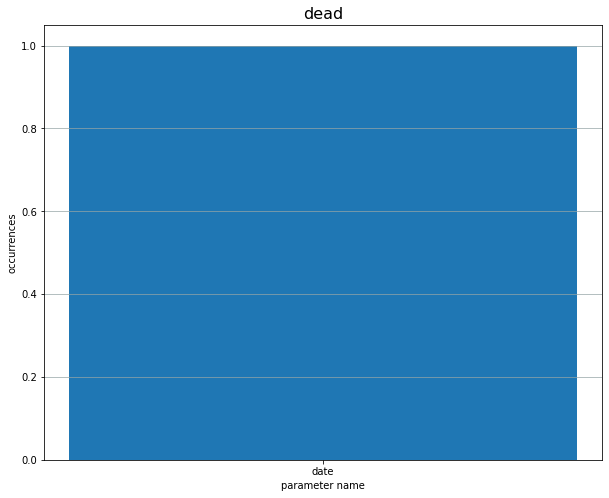

In [530]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        plt.figure(figsize=(10,8))
        plt.bar(most_used_parameters_per_template_grouped_df_list[i]['param_name'], most_used_parameters_per_template_grouped_df_list[i]['count'])
        plt.title(wikibreak, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='horizontal')
        plt.ylabel('occurrences')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [531]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        print('Template name: ', wikibreak)
        print('------------------------------------------------------------------')
        for i, val in extracted.sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
        print('------------------------------------------------------------------')

Template name:  exàmens
------------------------------------------------------------------
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: Llicenciat occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 1 param value: a occurrences: 1
Param name: 2 param 

Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: exàmens occurrences: 1
Param name: 1 param value: vacances occurrences: 1
Param name: 1 param value: intent occurrences: 1
Param name: 1 param value: intent occurrences: 1
Param name: 1 param value: normal occurrences: 1
Param name: 1 param value: normal occurrences: 1
Param name: 1 param value: 21 dies occurrences: 1
Param name: 1 param value: el 2017 occurrences

Param name: 2 param value: el 4 de març occurrences: 1
Param name: 2 param value: ben aviat occurrences: 1
Param name: 2 param value: el 2 de juny occurrences: 1
Param name: 2 param value: el 10 de juliol occurrences: 1
Param name: 2 param value: el 4 de març occurrences: 1
Param name: 2 param value: ben aviat occurrences: 1
Param name: 2 param value: el 2 de juny occurrences: 1
Param name: 2 param value: el 9 d'agost occurrences: 1
Param name: 2 param value: el 4 de març occurrences: 1
Param name: 2 param value: ben aviat occurrences: 1
Param name: 2 param value: el 2 de juny occurrences: 1
Param name: 2 param value: el 9 d'agost occurrences: 1
Param name: 2 param value: el 4 de març occurrences: 1
Param name: 2 param value: ben aviat occurrences: 1
Param name: 2 param value: el 2 de juny occurrences: 1
Param name: 2 param value: el 9 d'agost occurrences: 1
Param name: 2 param value: el 4 de març occurrences: 1
Param name: 2 param value: ben aviat occurrences: 1
Param name: 2 param va

Param name: 3 param value: Toquen coses com teoria de màquines, electrotècnia, modelització de sistemes, direcció d'empreses, disseny industrial... occurrences: 1
Param name: 3 param value: Visitarà [[Kosovo]] ([[Pristina]]) i la [[República Txeca]] ([[Praga]], [[Karlovy Vary]]...) occurrences: 1
Param name: 3 param value: Toquen coses com teoria de màquines, electrotècnia, modelització de sistemes, direcció d'empreses, disseny industrial... occurrences: 1
Param name: 3 param value: Visitarà [[Kosovo]] ([[Pristina]]) i la [[República Txeca]] ([[Praga]], [[Karlovy Vary]]...) occurrences: 1
Param name: 3 param value: Visitarà [[Kosovo]] ([[Pristina]]) i la [[República Txeca]] ([[Praga]], [[Karlovy Vary]]...) occurrences: 1
Param name: 3 param value: Visitarà [[Kosovo]] ([[Pristina]]) i la [[República Txeca]] ([[Praga]], [[Karlovy Vary]]...) occurrences: 1
Param name: 3 param value: Visitarà [[Kosovo]] ([[Pristina]]) i la [[República Txeca]] ([[Praga]], [[Karlovy Vary]]...) occurrences: 1

In [532]:
wikibreaks

array(['exàmens', 'viquidescans', 'usuari inactiu', 'inactiu', 'ocupat',
       'retired', 'dead', 'user warning-mentalhealth'], dtype=object)